In [335]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

#### NOTE: In order to run this notebook, place this in the folder containting all of the images.

## 1: Thresholding


#### 1.1

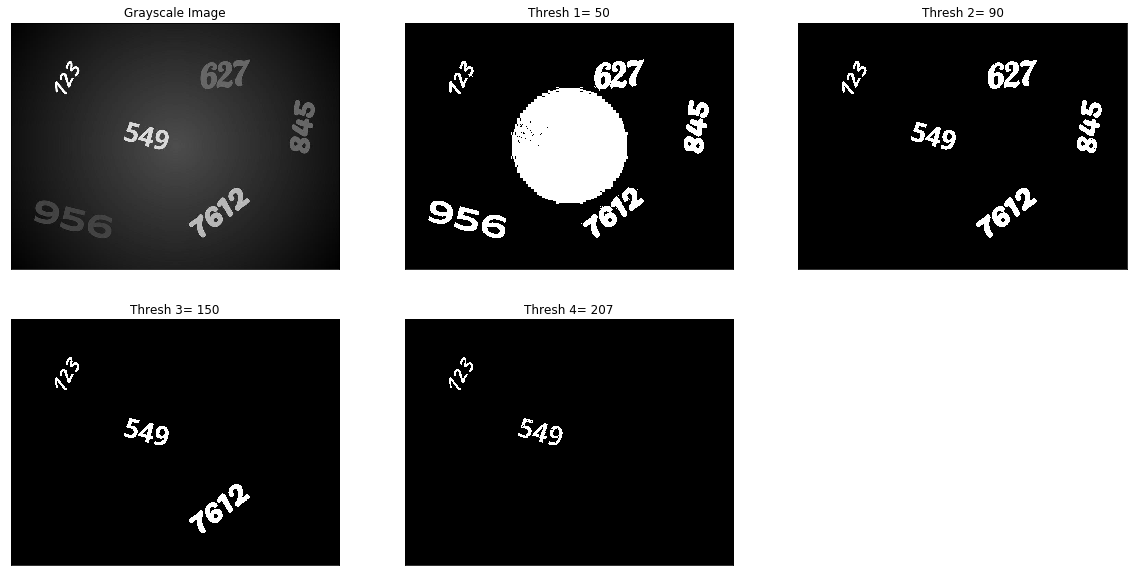

In [336]:
# load image
image_path = "./numbers.jpg"
img = cv2.imread(image_path)

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = img_gray.shape
fig = plt.figure()

# set the threshold
THRESH1 =55
THRESH2=90
THRESH3=150
THRESH4=207

# create a placeholder for the output
ret, thresh1 = cv2.threshold(img_gray, THRESH1, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_gray, THRESH2, 255, cv2.THRESH_BINARY)
ret, thresh3 = cv2.threshold(img_gray, THRESH3, 255, cv2.THRESH_BINARY)
ret, thresh4 = cv2.threshold(img_gray, THRESH4, 255, cv2.THRESH_BINARY)

#Plot images
plt.rcParams["figure.figsize"] = (20,10) #Increase plot size
plt.subplot(231), plt.imshow(img_gray, cmap="gray")
plt.title("Grayscale Image"), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(thresh1, cmap="gray")
plt.title("Thresh 1= 50"), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(thresh2, cmap="gray")
plt.title("Thresh 2= 90"), plt.xticks([]), plt.yticks([])
plt.subplot(234), plt.imshow(thresh3, cmap="gray")
plt.title("Thresh 3= 150"), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(thresh4, cmap="gray")
plt.title("Thresh 4= 207"), plt.xticks([]), plt.yticks([])

plt.show()

#### 1.2 & 1.3

1.2)
At Threshold_1 =55, we see that the numbers 549 are lost, since the grayscale image contains a large circle
in the center, with pixel intensity values of greater than 155. This engulfes the numbers 549, however numbers 549 is still included in the foreground, since its pixel intensity>55. We know this since in Threshold 2, the numbers 549 are present and the circle is gone.Obviously then the numbers 549 exceed the threshold of 55.
Hence, all numbers in threshold 1 are segmented, this means they all have an intensity>55.

At Threshold_2=90, The circle in the center is gone, since it had an intensity of <90. Other numbers with lower intensities are now part of the background. The numbers: 956 are in the background since they had intensities < 90. 
The segmented numbers are: 123,627,549,845,7612.

At Threshold_3= 150. Many sets of numbers have begun to disappear, the lower intensity numbers are gone. The segments that exist are 123, 549, 7612.

1.3)
By varying the hyper parameter, threshold, we found the desired output given in figure 1b at Threshold=207.



## 2: Filtering

#### 2.1 Denoising (1-4)

2.1.3:PSNR GAUSS (5X5) is:  34.46 
 PSNR BOX Filter (5x5) is:  32.64 
 Rounded to 2 Dec 
 PSNR GAUSS>PSNR BOX (5X5). Hence the Gaussian Filter gives the better result


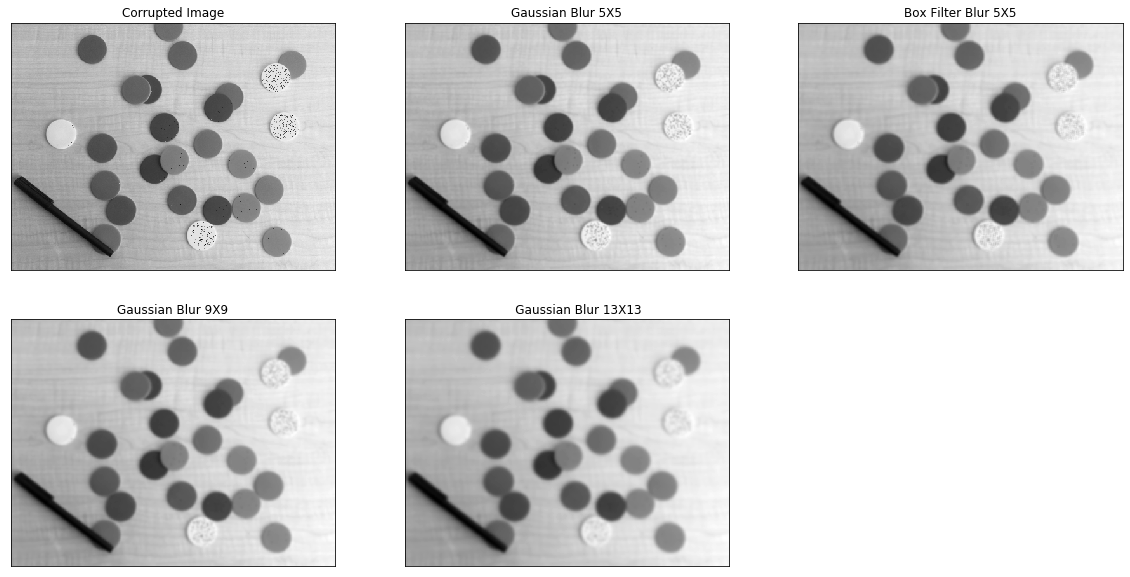

2.1.4:PSNR GAUSS (9X9) is:  32.68 
 PSNR GAUSS (13X13) is:  31.20 
 Rounded to 2 Dec


In [337]:
img = cv2.imread('Circles_gauss.png') #Open original image
cleanimg=cv2.imread('Circles.png') #Clean image for PSNR Calc

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Grayscale
cleanimg = cv2.cvtColor(cleanimg, cv2.COLOR_BGR2GRAY)

#Apply Filters
blur = cv2.GaussianBlur(img,(5,5),0) #2.1.1 Blur using a 5X5 Gaussian Filter
blur2 = cv2.blur(img,(5,5)) #2.1.2 5x5 Box Filter
gaus9=cv2.GaussianBlur(img,(9,9),0) #2.1.4 9x9 Gauss Filter
gaus13=cv2.GaussianBlur(img,(13,13),0) #2.1.4 13x13 Gauss Filter


#2.1.3 Calculate PSNR
PSNRGAUSS=cv2.PSNR(cleanimg,blur)
PSNRBOX=cv2.PSNR(cleanimg, blur2)
PSNRGAUSS9=cv2.PSNR(cleanimg,gaus9)
PSNRGAUSS13=cv2.PSNR(cleanimg,gaus13)

print("2.1.3:PSNR GAUSS (5X5) is: " ,"{0:.2f}".format(PSNRGAUSS),'\n',
      "PSNR BOX Filter (5x5) is: ", "{0:.2f}".format(PSNRBOX),'\n', "Rounded to 2 Dec", '\n',
     "PSNR GAUSS>PSNR BOX (5X5). Hence the Gaussian Filter gives the better result")


#Plot Images in 2 Row, 3 Columns
plt.rcParams["figure.figsize"] = (20,10) #Increase plot size
plt.subplot(231),plt.imshow(img,cmap="gray"),plt.title('Corrupted Image')
plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(blur,cmap="gray"),plt.title('Gaussian Blur 5X5')
plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(blur2,cmap="gray"),plt.title('Box Filter Blur 5X5')
plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(gaus9,cmap="gray"),plt.title('Gaussian Blur 9X9')
plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(gaus13,cmap="gray"),plt.title('      Gaussian Blur 13X13')
plt.xticks([]), plt.yticks([])
plt.show()

print("2.1.4:PSNR GAUSS (9X9) is: " ,"{0:.2f}".format(PSNRGAUSS9),'\n',
     "PSNR GAUSS (13X13) is: " ,"{0:.2f}".format(PSNRGAUSS13),'\n',
     "Rounded to 2 Dec")


2.1.4) <br>
We can see from comparing the PSNR values of Gaussian filters of different kernel size,
that the PSNR decreases as we increases the kernel size to (9x9) and then (13x13).
Visually the image quality decreases since it becomes less sharp, and the objects no longer have as strong boundaries as seen in lower kernel sizes like (5x5).
The greater the kernel size, the less visually sharp the image becomes and the PSNR value also decreases in this case.

#### 2.1 Denoising (5-8)

 PSNR GAUSS (5X5) is:  28.95 
 PSNR GAUSS (9x9) is:  30.63 
 PSNR GAUSS (13x13) is:  30.25 
 PSNR Median (5x5) is:  37.33 
 PSNR Median (9x9) is:  34.61 
 PSNR Median (13x13) is:  32.56 
 Rounded to 2 Dec 



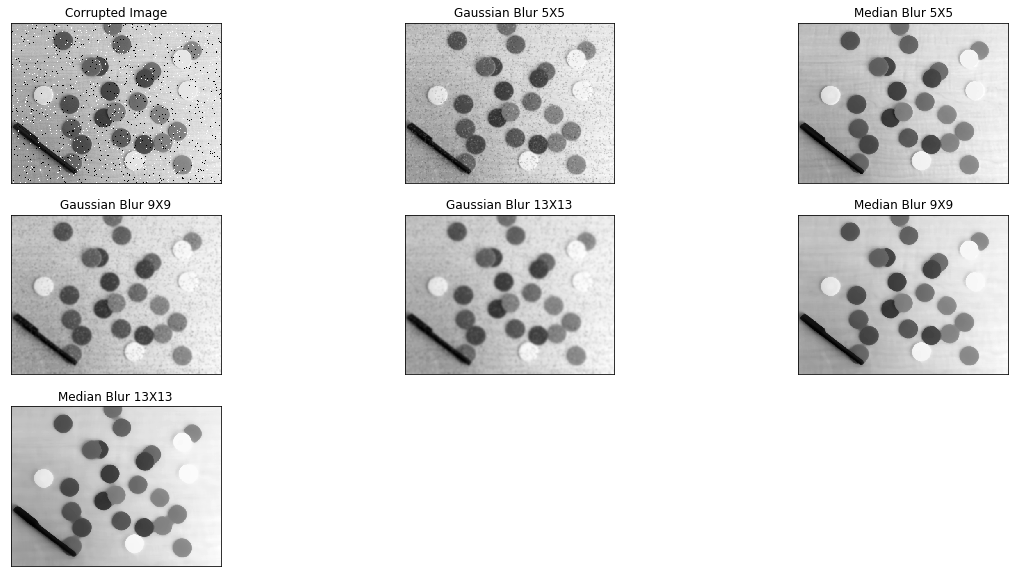

In [338]:
img1 = cv2.imread('Circles_sp.png') #Open original image
cleanimg1=cv2.imread('Circles.png') #Clean image for PSNR Calc

img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) #Grayscale
cleanimg = cv2.cvtColor(cleanimg1, cv2.COLOR_BGR2GRAY)


#Apply Filters
blur = cv2.GaussianBlur(img,(5,5),0) #2.1.5 Blur using a 5X5 Gaussian Filter
blur2 = cv2.medianBlur(img,5) #2.1.6 5x5 median Filter
gaus9 =cv2.GaussianBlur(img,(9,9),0) #2.1.8 9x9 Gauss Filter
gaus13 =cv2.GaussianBlur(img,(13,13),0) #13x13 Gauss Filter
med9 =cv2.medianBlur(img,9) #9x9 median Filter
med13 =cv2.medianBlur(img,13) #13x13 median Filter


#2.1.7 Calculate PSNR 
PSNRGAUSS=cv2.PSNR(cleanimg,blur)
PSNRMED=cv2.PSNR(cleanimg, blur2)
PSNRGAUSS9=cv2.PSNR(cleanimg,gaus9)
PSNRGAUSS13=cv2.PSNR(cleanimg,gaus13)
PSNRMED9=cv2.PSNR(cleanimg,med9)
PSNRMED13=cv2.PSNR(cleanimg,med13)

print(" PSNR GAUSS (5X5) is: " ,"{0:.2f}".format(PSNRGAUSS),'\n',
      "PSNR GAUSS (9x9) is: ", "{0:.2f}".format(PSNRGAUSS9),'\n',
      "PSNR GAUSS (13x13) is: ", "{0:.2f}".format(PSNRGAUSS13),'\n',
      "PSNR Median (5x5) is: ", "{0:.2f}".format(PSNRMED),'\n',
      "PSNR Median (9x9) is: ", "{0:.2f}".format(PSNRMED9),'\n',
      "PSNR Median (13x13) is: ", "{0:.2f}".format(PSNRMED13),'\n',
       "Rounded to 2 Dec", '\n')

#Plot Images in 3 Row, 3 Columns
plt.rcParams["figure.figsize"] = (20,10) #Increase plot size
plt.subplot(331),plt.imshow(img, cmap="gray"),plt.title('Corrupted Image')
plt.xticks([]), plt.yticks([])
plt.subplot(332),plt.imshow(blur, cmap="gray"),plt.title('Gaussian Blur 5X5')
plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(blur2, cmap="gray"),plt.title('Median Blur 5X5')
plt.xticks([]), plt.yticks([])
plt.subplot(334),plt.imshow(gaus9, cmap="gray"),plt.title('Gaussian Blur 9X9')
plt.xticks([]), plt.yticks([])
plt.subplot(335),plt.imshow(gaus13, cmap="gray"),plt.title('Gaussian Blur 13X13')
plt.xticks([]), plt.yticks([])
plt.subplot(336),plt.imshow(med9, cmap="gray"),plt.title('Median Blur 9X9')
plt.xticks([]), plt.yticks([])
plt.subplot(337),plt.imshow(med13, cmap="gray"),plt.title('Median Blur 13X13')
plt.xticks([]), plt.yticks([])
plt.show()



2.1.7) By comparing the PSNR sizes we see that the PSNR increases for Gaussian filter with 9x9 being the highest, and then it decreases at 13x13. However, for the median filter we see that the highest PSNR is with the lowest kernel size of 5x5. As we increase the Kernel size to 9x9 and then 13x13 then PSNR decreases.<br>
In terms of image quality, as we increase the Kernel size for Median Blur, the image quality decreases since the shapes are less easily distinguishable and the wood pattern disappears. Median Blur 5x5 gets rid of most salt and pepper noise.<br>
2.1.8) For Gaussian, increasing kernel size decreases image quality, the image becomes more blurry, however a lower kernel size still has Salt+Pepper. Kernel Size 9 is the better option, it is not noticeably blurry, and does not have salt and pepper noise. 



#### 2.2 Sharpening

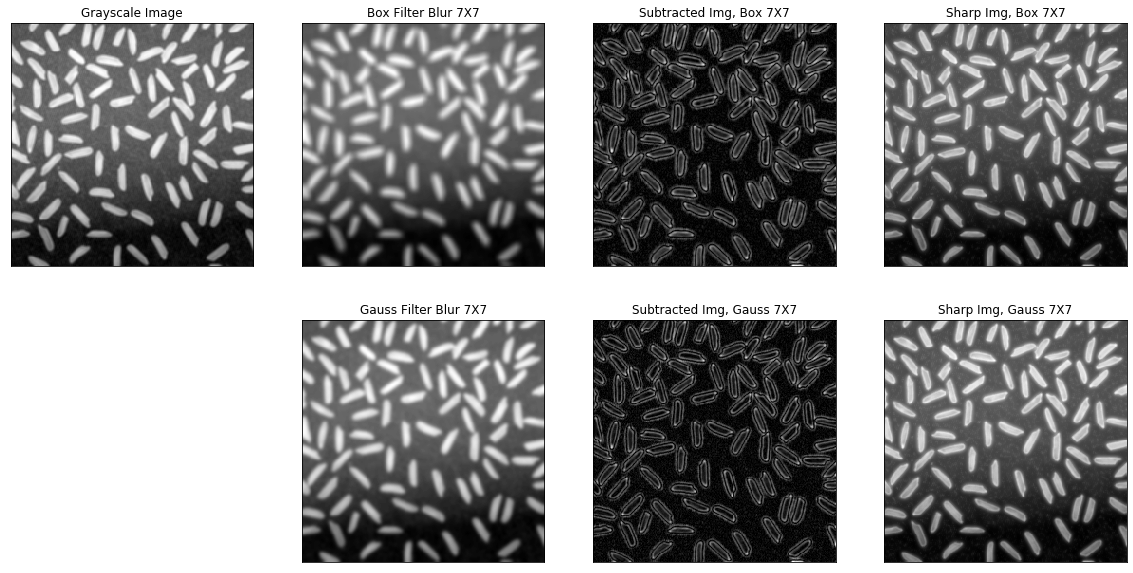

In [339]:
#1
img_path="rice.png"
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#img = cv2.imread('rice.png') #Open original image
#img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = img_gray.shape
fig = plt.figure()


#Apply Filters
blur = cv2.blur(img_gray,(7,7)) #2.2.1 Blur using a 7X7 Box Filter
diff=cv2.absdiff(img_gray,blur) #Taking Difference of original and box blurred
sharpimg=cv2.add(img_gray,diff) #adding details and original image

blurGauss = cv2.GaussianBlur(img_gray,(7,7),0) #2.2.2 Blur using a 7X7 Gaussian Filter
diffGauss=cv2.absdiff(img_gray,blurGauss)#Taking Difference of original and Gauss blurred
sharpGauss=cv2.add(img_gray, diffGauss)#adding details and original image

#Plot Images in 2 Row, 4 Columns
plt.rcParams["figure.figsize"] = (20,10) #Increase plot size
plt.subplot(241),plt.imshow(img_gray, cmap="gray"),plt.title('Grayscale Image')
plt.xticks([]), plt.yticks([])
plt.subplot(242),plt.imshow(blur, cmap="gray"),plt.title('Box Filter Blur 7X7')
plt.xticks([]), plt.yticks([])
plt.subplot(243),plt.imshow(diff, cmap="gray"),plt.title('Subtracted Img, Box 7X7')
plt.xticks([]), plt.yticks([])
plt.subplot(244),plt.imshow(sharpimg, cmap="gray"),plt.title('Sharp Img, Box 7X7')
plt.xticks([]), plt.yticks([])
plt.subplot(246),plt.imshow(blurGauss, cmap="gray"),plt.title('Gauss Filter Blur 7X7')
plt.xticks([]), plt.yticks([])
plt.subplot(247),plt.imshow(diffGauss, cmap="gray"),plt.title('Subtracted Img, Gauss 7X7')
plt.xticks([]), plt.yticks([])
plt.subplot(248),plt.imshow(sharpGauss, cmap="gray"),plt.title('Sharp Img, Gauss 7X7')
plt.xticks([]), plt.yticks([])


plt.show()

2.2.2: <br>
The Gaussian is expected to give better results, since the Gaussian takes the weighted average, the gaussian blur gives greater features. The median blur takes a simple average, hence small features are distorted. So that when we compute the Details (Image-Blur), the Gaussian should give more distinct details therefore more sharpness. <br>
The results can not be observed, both the Gaussian and Box filter give similar results. Probably because the images are very simple.

## 3: Edge Detection
#### 3.1 Sobel Edge Detector

(Text(0.5, 1.0, 'Sobel Gaussian-Sharpened- Vertical'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

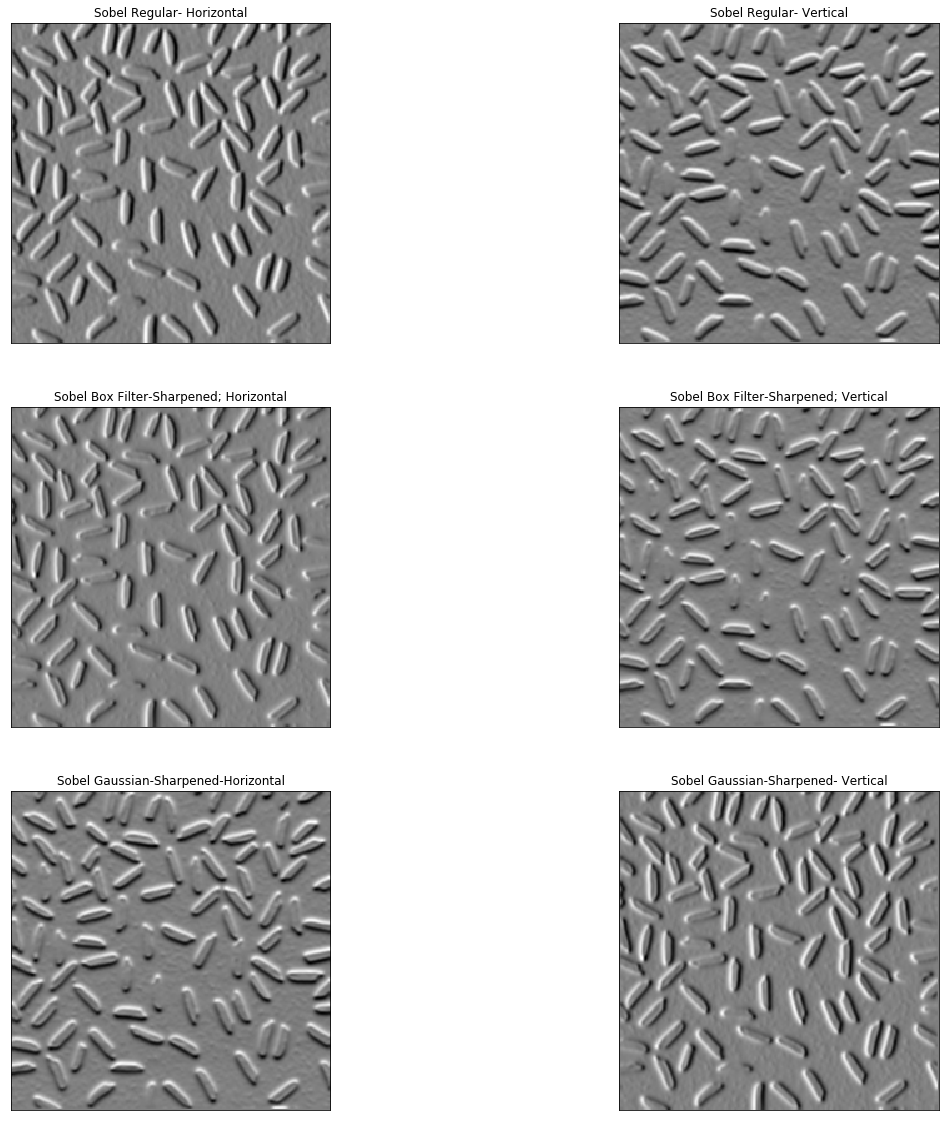

In [340]:
#1
img = cv2.imread('rice.png') #Open original image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply 5x5 Sobel filters to the intensity channel
sobel = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
sobel2= cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)


#2
sobbox2 = cv2.Sobel(sharpimg, cv2.CV_64F, 0, 1, ksize=5)
sobbox = cv2.Sobel(sharpimg, cv2.CV_64F, 1, 0, ksize=5)


sobgauss2 = cv2.Sobel(sharpGauss, cv2.CV_64F, 1, 0, ksize=5)
sobgauss = cv2.Sobel(sharpGauss, cv2.CV_64F, 0, 1, ksize=5)



# display images
plt.figure(figsize=(20, 20))
plt.subplot(321), plt.imshow(sobel, cmap="gray")
plt.title("Sobel Regular- Horizontal"), plt.xticks([]), plt.yticks([])
plt.subplot(322), plt.imshow(sobel2, cmap="gray")
plt.title("Sobel Regular- Vertical"), plt.xticks([]), plt.yticks([])
plt.subplot(323), plt.imshow(sobbox, cmap="gray")
plt.title("Sobel Box Filter-Sharpened; Horizontal"), plt.xticks([]), plt.yticks([])
plt.subplot(324), plt.imshow(sobbox2, cmap="gray")
plt.title("Sobel Box Filter-Sharpened; Vertical"), plt.xticks([]), plt.yticks([])
plt.subplot(325), plt.imshow(sobgauss, cmap="gray")
plt.title("Sobel Gaussian-Sharpened-Horizontal"), plt.xticks([]), plt.yticks([])
plt.subplot(326), plt.imshow(sobgauss2, cmap="gray")
plt.title("Sobel Gaussian-Sharpened- Vertical"), plt.xticks([]), plt.yticks([])


##### Image Gradient

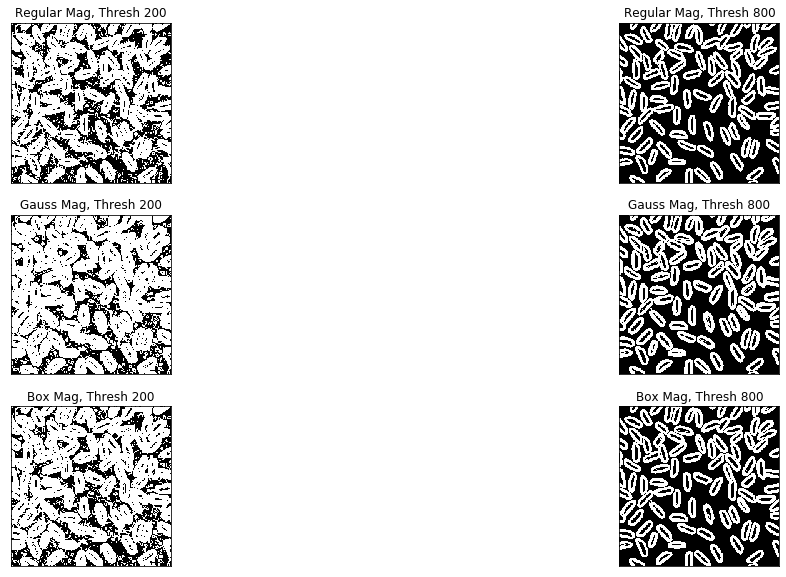

In [341]:
#3
sobel2= cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)#Magnitude and phase for reg. img.
I_x1 = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
I_y1 = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)
I_m1 = cv2.magnitude(I_x1, I_y1)
I_p1 = cv2.phase(I_x1, I_y1)

sobbox2 = cv2.Sobel(sharpimg, cv2.CV_64F, 0, 1, ksize=5)#Magnitude and phase for Box. img.
I_x2 = cv2.Sobel(sharpimg, cv2.CV_64F, 1, 0, ksize=5)
I_y2 = cv2.Sobel(sharpimg, cv2.CV_64F, 0, 1, ksize=5)
I_m2 = cv2.magnitude(I_x2, I_y2)
I_p2 = cv2.phase(I_x2, I_y2)

sobgauss2 = cv2.Sobel(sharpGauss, cv2.CV_64F, 1, 0, ksize=5)#Magnitude and phase for Gauss img.
I_x3 = cv2.Sobel(sharpGauss, cv2.CV_64F, 1, 0, ksize=5)
I_y3 = cv2.Sobel(sharpGauss, cv2.CV_64F, 0, 1, ksize=5)
I_m3 = cv2.magnitude(I_x3, I_y3)
I_p3 = cv2.phase(I_x3, I_y3)

THRESH1=200
THRESH2=800

ret, thresh1 = cv2.threshold(I_m1, THRESH1, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(I_m1, THRESH2, 255, cv2.THRESH_BINARY)

ret, thresh3 = cv2.threshold(I_m2, THRESH1, 255, cv2.THRESH_BINARY)
ret, thresh4 = cv2.threshold(I_m2, THRESH2, 255, cv2.THRESH_BINARY)

ret, thresh5 = cv2.threshold(I_m3, THRESH1, 255, cv2.THRESH_BINARY)
ret, thresh6 = cv2.threshold(I_m3, THRESH2, 255, cv2.THRESH_BINARY)



# display images
plt.figure(figsize=(20, 10))
plt.subplot(321), plt.imshow(thresh1, cmap="gray")
plt.title("Regular Mag, Thresh 200"), plt.xticks([]), plt.yticks([])
plt.subplot(322), plt.imshow(thresh2, cmap="gray")
plt.title("Regular Mag, Thresh 800"), plt.xticks([]), plt.yticks([])
plt.subplot(323), plt.imshow(thresh3, cmap="gray")
plt.title("Gauss Mag, Thresh 200"), plt.xticks([]), plt.yticks([])
plt.subplot(324), plt.imshow(thresh4, cmap="gray")
plt.title("Gauss Mag, Thresh 800"), plt.xticks([]), plt.yticks([])
plt.subplot(325), plt.imshow(thresh5, cmap="gray")
plt.title("Box Mag, Thresh 200"), plt.xticks([]), plt.yticks([])
plt.subplot(326), plt.imshow(thresh6, cmap="gray")
plt.title("Box Mag, Thresh 800"), plt.xticks([]), plt.yticks([])

plt.show()

3.1.1.4: Comment on the effectiveness of using sharpening prior to the edge detection: (2 points)<br>
    By sharpening prior to edge detection, we get thinner and more distinct edges. Hence sharpening prior is effective for edge detection. <br>
    <br>
3.1.1.5: Comment on the effect of the different threshold values: <br>
At higher threshold values we see thinner and more distinct edges, the shapes are visibly different. At lower threshold values the edge detection is poor, and the edges and shapes are not distinct.

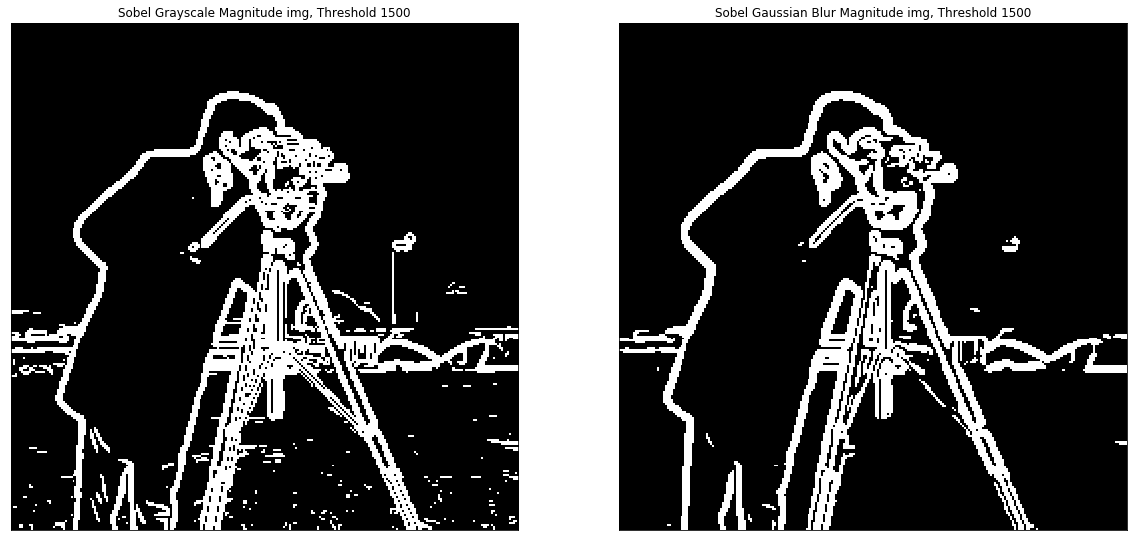

In [342]:
#3.1.2
img = cv2.imread('cameraman.jpg') #Open original image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurGauss = cv2.GaussianBlur(img_gray,(5,5),0) #Blur using a 5X5 Gaussian Filter

# apply 5x5 Sobel filters to the intensity channel, Original Grayscale pic
sobel = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
#calculate image magnitude and phase
I_x1 = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
I_y1 = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)
I_m1 = cv2.magnitude(I_x1, I_y1)
I_p1 = cv2.phase(I_x1, I_y1)

# apply 5x5 Sobel filters to the 5X5 Gaussian Denoised Picture.
sobel2 = cv2.Sobel(blurGauss, cv2.CV_64F, 1, 0, ksize=5)
#calculate image magnitude and phase
I_x2 = cv2.Sobel(blurGauss, cv2.CV_64F, 1, 0, ksize=5)
I_y2 = cv2.Sobel(blurGauss, cv2.CV_64F, 0, 1, ksize=5)
I_m2 = cv2.magnitude(I_x2, I_y2)
I_p2 = cv2.phase(I_x2, I_y2)

THRESH32=1500
ret, thresh1 = cv2.threshold(I_m1, THRESH32, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(I_m2, THRESH32, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(thresh1, cmap="gray")
plt.title("Sobel Grayscale Magnitude img, Threshold 1500"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(thresh2, cmap="gray")
plt.title("Sobel Gaussian Blur Magnitude img, Threshold 1500"), plt.xticks([]), plt.yticks([])
plt.show()

3.1.2.3: Comment on the effectiveness of using denoising prior to edge detection: (2 points) <br>
Denoising is effective when it comes to edge detection, it gets rid of small details in the image that are not edges, and serve as a distraction. Denoising smooths out the image in order to remove extraneous features in edge detection.

#### 3.2 Laplacian of Gaussian

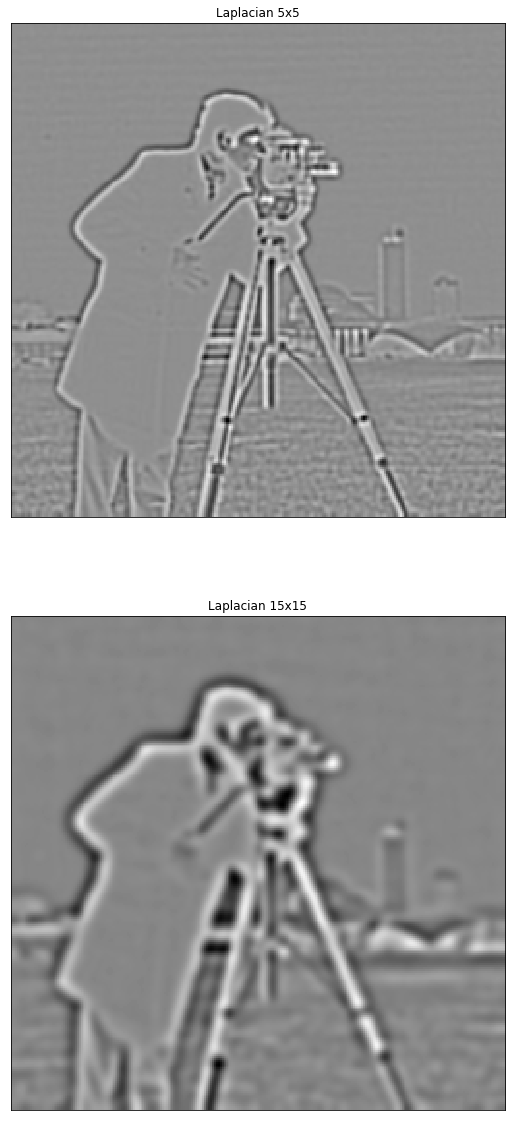

In [343]:
img = cv2.imread('cameraman.jpg') #Open original image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#Grayscale

#Gaussian
img_gray1=cv2.GaussianBlur(img_gray,(5,5),0)
img_gray2=cv2.GaussianBlur(img_gray,(15,15),0)

#Laplacian of Gaussian

#1
I_lap = cv2.Laplacian(img_gray1, cv2.CV_32F, ksize=5) #5x5
#2

I_lap2= cv2.Laplacian(img_gray2, cv2.CV_32F, ksize=15) #15x15

# display images
plt.figure(figsize=(20, 20))
plt.subplot(211), plt.imshow(I_lap, cmap="gray")
plt.title("Laplacian 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(212), plt.imshow(I_lap2, cmap="gray")
plt.title("Laplacian 15x15"), plt.xticks([]), plt.yticks([])
plt.show()


3.2.2, Write your observations about the edge maps: <br>
With a kernel size of 5, we see that the zero crossings are more distinct. The edges are more noticeable. If we increase the kernel size, the edge map is more blurred, and the zero crossings blend in with the background, edges are less likely to be distinguished.

#### 3.3 Canny Edge Detection

3.3.1: <br>
4 Steps of Canny Edge Detection:

1- Filter the image with x, y derivatives of Gaussian <br>
2- Find the magnitude and orientation (phase) of gradient<br>
3- Non‐maximum suppression:<br>
    • Thin multi‐pixel wide “ridges” down to single<br>
        pixel width<br>
4- Thresholding and linking (hysteresis):<br>
    • Define two thresholds: low and high<br>
    • Use the high threshold to start edge curves and<br>
            the low threshold to continue them<br>

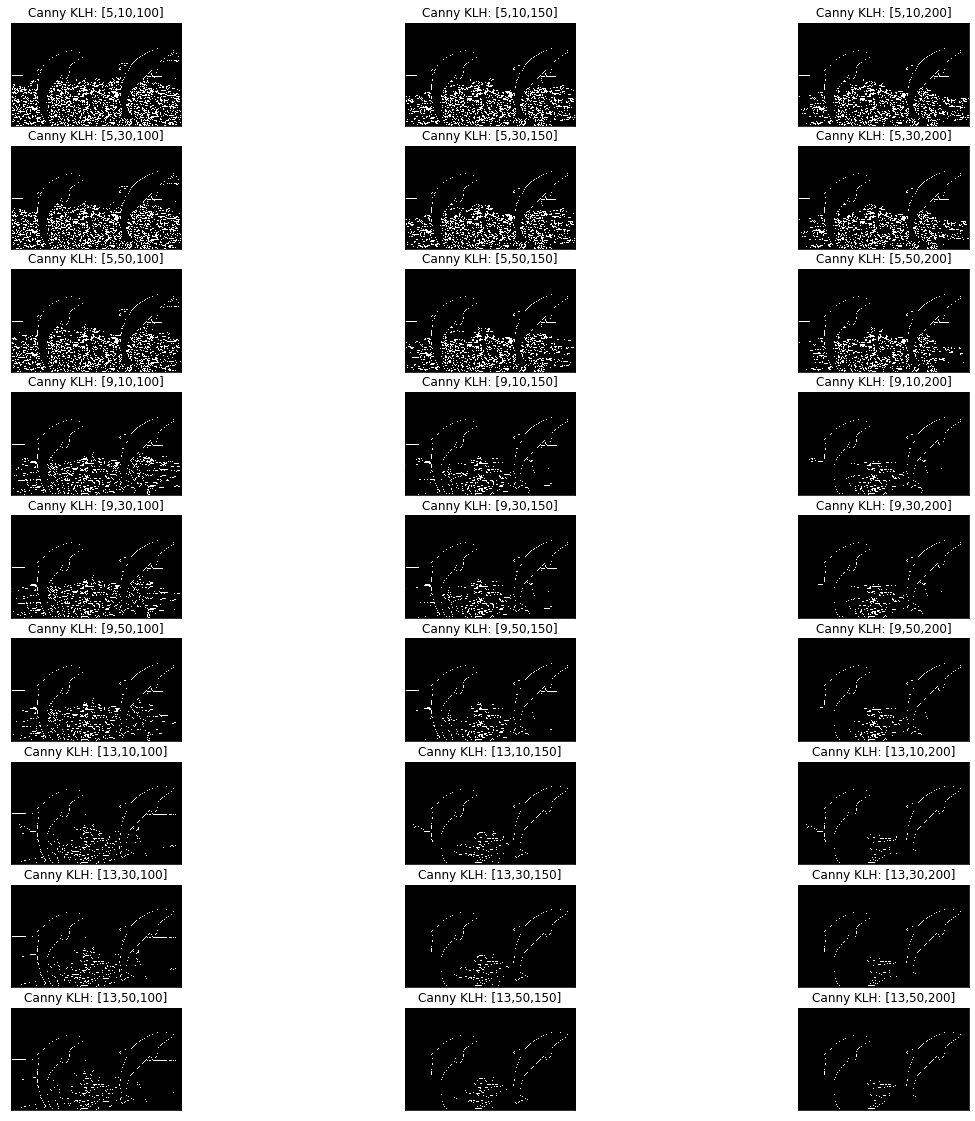

In [344]:
# load image as gray-scaled
img = cv2.imread("./dolphin.jpg", cv2.IMREAD_GRAYSCALE)

# blur image before-hand
imgG5 = cv2.GaussianBlur(img, (5, 5), 0)
imgG9 = cv2.GaussianBlur(img, (9, 9), 0)
imgG13 = cv2.GaussianBlur(img, (13, 13), 0)

LOW1=10
LOW2=30
LOW3=50

HIGH1=100
HIGH2=150
HIGH3=200

GAUSS=[imgG5, imgG9, imgG13]
gval=[5,9,13]
L=[LOW1, LOW2, LOW3]
H=[HIGH1, HIGH2, HIGH3]
count=1;



# compute Canny edges
plt.figure(figsize=(20, 20))
for x in range(0, 3):
    for y in range (0, 3):
        for z in range (0, 3):
            g=gval[x]
            lo=L[y]
            hi=H[z]
            I_edge = cv2.Canny(GAUSS[x],L[y] ,H[z])
            plt.subplot(9,3,count), plt.imshow(I_edge, cmap="gray")
            plt.title("Canny KLH: " +"["+str(g)+","+str(lo)+","+str(hi)+"]"),
            plt.xticks([]), plt.yticks([])
            count+=1

plt.show()


3.3.3.:Comment on how changing values of each hyper-parameters (K,L,U) effects the overall edge detection. Is there is any relationship between any hyper-parameters? (3 points) <br>
By increasing the Lower threshold we begin to notice that less details are present with lower gradient values. <br>
As we increase the Higher threshold we begin to notice that the real strong edges of the image remain, even when low gradient values (from noise and color variations) are filtered out. <br>
By increasing kernel size our edges get weaker and we see thinner edges, but also less noise variation as well.


<function matplotlib.pyplot.show(*args, **kw)>

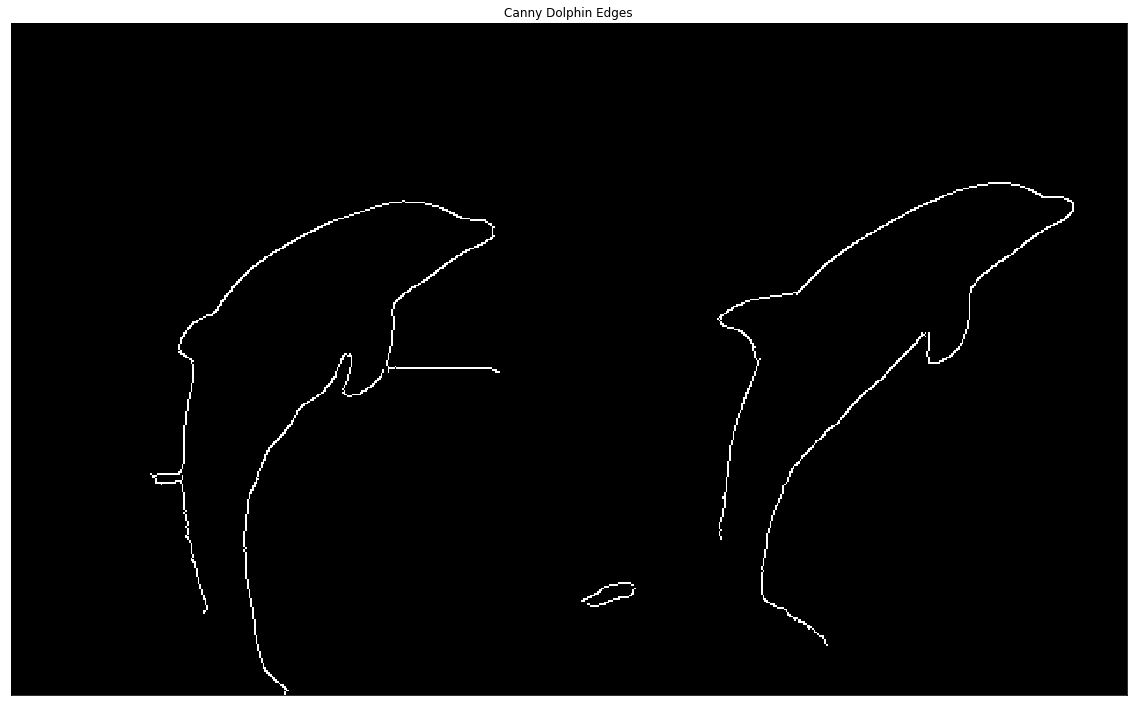

In [345]:
#3.34 Find a value of each hyper-parameter such that only dolphin edges are detected. (Figure 4(b))

imgG15 = cv2.GaussianBlur(img, (15, 15), 0)
I_edge = cv2.Canny(imgG15,10 ,200)

plt.figure(figsize=(20, 20))
plt.subplot(1,1,1), plt.imshow(I_edge, cmap="gray")
plt.title("Canny Dolphin Edges"),
plt.xticks([]), plt.yticks([])
plt.show
